In [6]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve
from utils import evaluate_classification_model
import tensorflow as tf

{'loss': [0.05181258171796799, 0.03543304279446602, 0.033280886709690094, 0.03158250078558922, 0.030381951481103897, 0.029621386900544167, 0.028937429189682007, 0.028199901804327965, 0.02759452536702156, 0.026321234181523323, 0.02590794488787651, 0.02548523247241974, 0.02511131949722767, 0.024736717343330383, 0.0247154850512743], 'auc': [0.5410643219947815, 0.5514209866523743, 0.560611367225647, 0.5867043733596802, 0.617918848991394, 0.6415616273880005, 0.6651561856269836, 0.6902396082878113, 0.7117547392845154, 0.7566332221031189, 0.771103024482727, 0.7849788069725037, 0.7948426008224487, 0.8067938089370728, 0.8079303503036499], 'val_loss': [0.03083430975675583, 0.031006457284092903, 0.03084050491452217, 0.02880004234611988, 0.030031094327569008, 0.02736542373895645, 0.027421627193689346, 0.027858620509505272, 0.026918113231658936, 0.02592081017792225, 0.025912722572684288, 0.026029391214251518, 0.02599862962961197, 0.0260932520031929, 0.0260990709066391], 'val_auc': [0.55871218442916

Text(0.5, 1.0, 'Train/Val Loss x Epochs - Global')

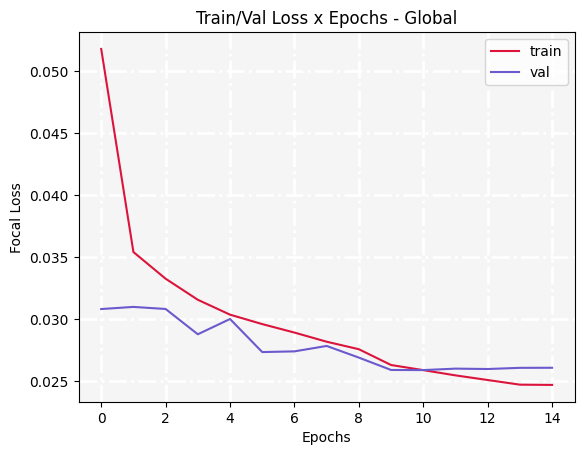

In [7]:
with open(f"/home/matheus_levy/workspace/lucas/metrics/model_v1/history_global_model_v1", "rb") as f:
    h = pickle.load(f)
print(h)
plt.xlabel("Epochs")
plt.ylabel("Focal Loss")
plt.gca().set_facecolor("whitesmoke")
plt.grid(color='w', linewidth=2, linestyle='-.')
plt.plot(h['loss'], c='crimson')
plt.plot(h['val_loss'], c='slateblue')
plt.legend(['train', 'val'])
# plt.ylim(0.06, 0.1)  # Define o intervalo de 0,1 a 0,9 no eixo y

plt.title("Train/Val Loss x Epochs - Global")

In [8]:
def plot_roc_curve(path, title):
    with open(path, "rb") as f:
        var = pickle.load(f)
    plt.figure(figsize=(10, 8))
    for i in range(len(var['labels'])):
        fpr, tpr, _ = roc_curve(var['groun_truth'][:, i], var['predictions'][:, i])
        plt.plot(fpr, tpr, label=var['labels'][i] + ' (AUC = {:.2f})'.format(var['auc_scores'][i]))
    print(f"Auc-Macro = {var['auc_macro']}")
    print(f"Auc-Micro = {var['auc_micro']}")
    print(f"Auc-Weighted = {var['auc_weighted']}")
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivos')
    plt.title(f'Curva ROC para cada classe: {title}')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

Auc-Macro = 0.8336300203318485
Auc-Micro = 0.8855695473896054
Auc-Weighted = 0.8002077173158726


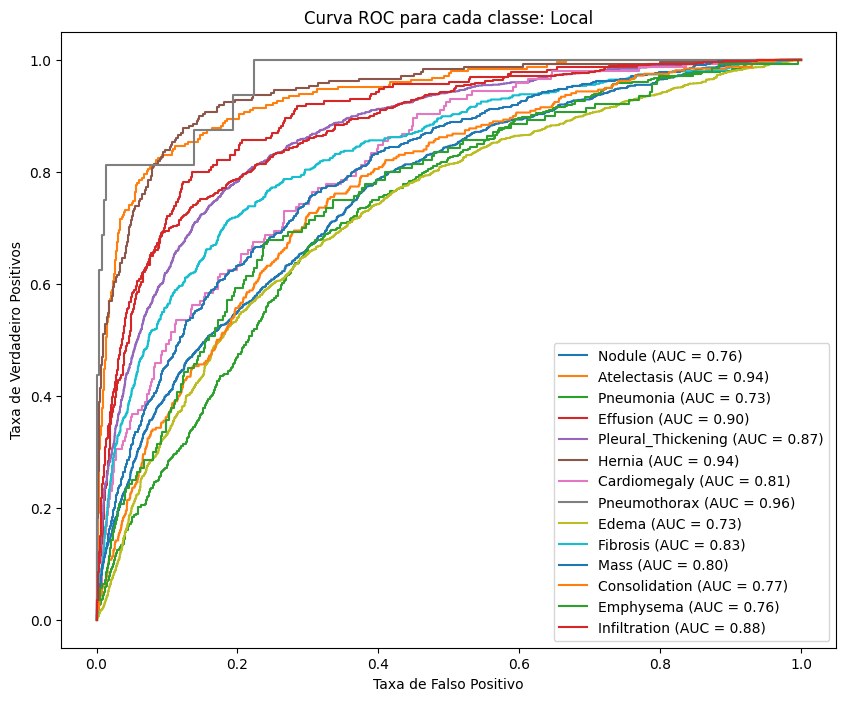

In [9]:
plot_roc_curve('/home/matheus_levy/workspace/lucas/metrics/model_v1/metrics_global_model_v1', "Local")